🔄 What is Autograd in PyTorch?\
autograd is PyTorch's automatic differentiation engine.
It automatically calculates gradients (partial derivatives) for tensor operations, which are essential for training neural networks using optimization techniques like backpropagation.

💭 Why is Autograd Important?\
In deep learning, we use loss functions and optimize weights by calculating how much a change in each weight affects the loss — this is done using gradients.

Without autograd, you'd need to calculate derivatives manually — which is error-prone and tedious.
Autograd handles this automatically during the backward pass.

🔍 How Does It Work?\
Autograd builds a computational graph dynamically as operations are performed on tensors.
This graph:

Stores what operations were done

Tracks which tensors require gradients

Then, calling .backward() traverses this graph in reverse to compute gradients.

In [14]:
def dy_dx(x):
  return 2*x

In [15]:
dy_dx(3)

6

In [16]:
import torch

In [17]:
x = torch.tensor(3.0, requires_grad=True)

In [18]:
y = x**2

In [19]:
x

tensor(3., requires_grad=True)

In [20]:
y

tensor(9., grad_fn=<PowBackward0>)

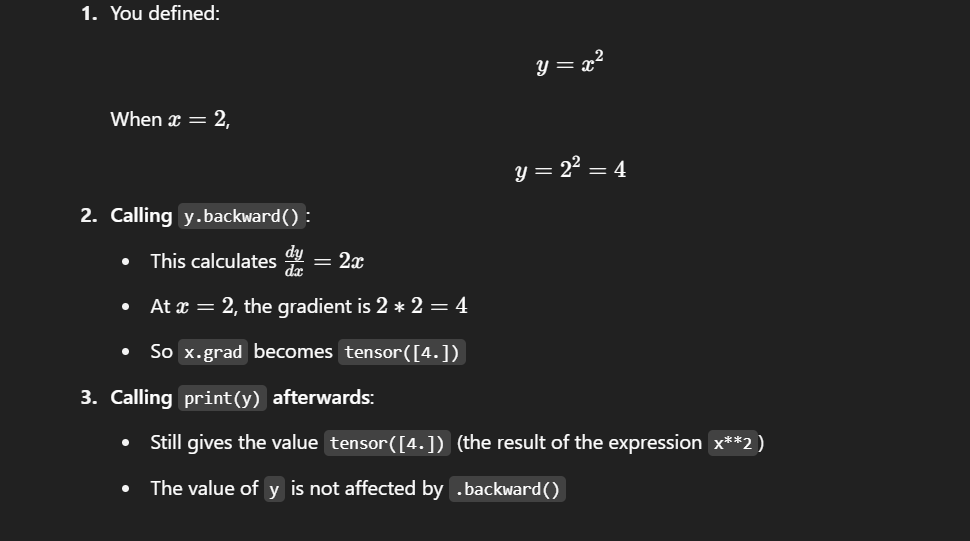

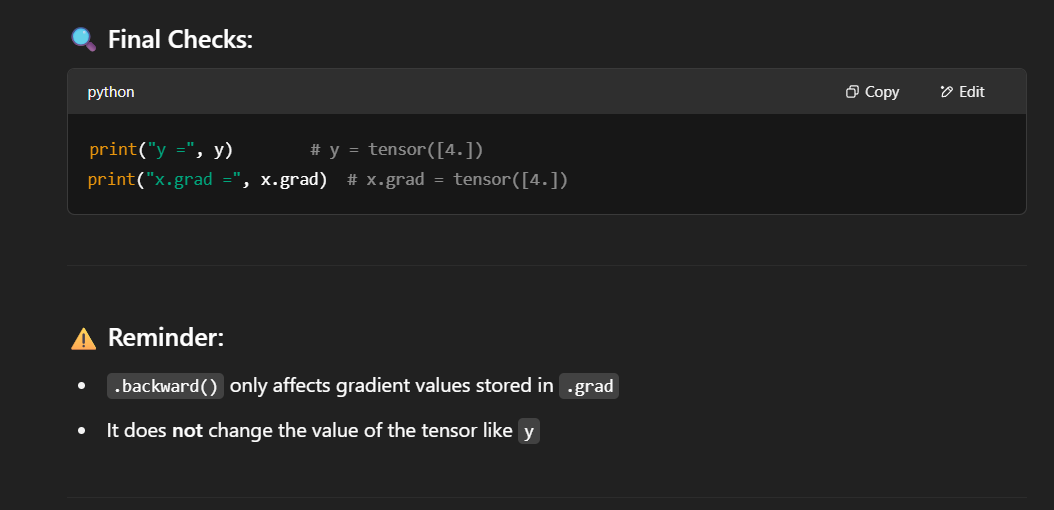

In [21]:
y.backward()

In [22]:
y

tensor(9., grad_fn=<PowBackward0>)

In [23]:
x.grad

tensor(6.)

In [24]:
import math

def dz_dx(x):
    return 2 * x * math.cos(x**2)

In [25]:
dz_dx(4)

-7.661275842587077

In [26]:
x = torch.tensor(4.0, requires_grad=True)

In [27]:
y = x ** 2

In [28]:
z = torch.sin(y)

In [29]:
x

tensor(4., requires_grad=True)

In [30]:
y

tensor(16., grad_fn=<PowBackward0>)

In [31]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [32]:
z.backward()

In [35]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [36]:
x.grad

tensor(-7.6613)

In [37]:
y.grad

<ipython-input-37-10b3a7061f6d>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


In [38]:
import torch

# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [39]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [40]:
# Forward pass
z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [41]:
loss

tensor(6.7012)

In [42]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [43]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


In [44]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [45]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [46]:
w

tensor(1., requires_grad=True)

In [47]:
b

tensor(0., requires_grad=True)

In [48]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [49]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [50]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [51]:
loss.backward()

In [52]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


In [53]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

In [54]:
x

tensor([1., 2., 3.], requires_grad=True)

In [55]:
y = (x**2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [56]:
y.backward()

In [57]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

In [58]:
# clearing grad
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [59]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [60]:
y.backward()

In [61]:
x.grad

tensor(4.)

In [62]:
x.grad.zero_()

tensor(0.)

In [63]:
# disable gradient tracking
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [64]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [65]:
y.backward()

In [66]:
x.grad

tensor(4.)

In [67]:
# option 1 - requires_grad_(False)
# option 2 - detach()
# option 3 - torch.no_grad()

In [68]:
x.requires_grad_(False)

tensor(2.)

In [69]:
x

tensor(2.)

In [70]:
y = x ** 2

In [71]:
y

tensor(4.)

In [72]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [73]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [74]:
z = x.detach()
z

tensor(2.)

In [75]:
y = x ** 2

In [76]:
y

tensor(4., grad_fn=<PowBackward0>)

In [77]:
y1 = z ** 2
y1

tensor(4.)

In [78]:
y.backward()

In [79]:
y1.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [80]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [81]:
y = x ** 2

In [82]:
y

tensor(4., grad_fn=<PowBackward0>)

In [83]:
y.backward()

In [84]:
y

tensor(4., grad_fn=<PowBackward0>)